# Electricity Price Prediction with Machine Learning

## Elektrik Fiyatı Tahmini Projesi: Adım Adım Makine Öğrenmesi
Bu projede, bir CSV dosyasından elektrik fiyatı verilerini okuyacak, veri analizi yapacak ve makine öğrenmesi modeliyle fiyat tahmini yapacağız.

[Electricity Price Prediction with Machine Learning](https://thecleverprogrammer.com/2021/11/15/electricity-price-prediction-with-machine-learning/)

## Veri Yükleme

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("electric.csv")

C:\Users\BETÜL\AppData\Local\Temp\ipykernel_15748\1038252371.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("electric.csv")


In [6]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87



| Sütun Adı                | Açıklama                                                                 |
|--------------------------|--------------------------------------------------------------------------|
| **DateTime**             | Kaydın tarih ve saat bilgisi.                                           |
| **Holiday**              | Eğer gün ulusal bir tatilse tatil adını içerir.                        |
| **HolidayFlag**          | Eğer bir bank holiday ise 1, aksi halde 0 değerini içerir.             |
| **DayOfWeek**           | 0-6 arası değerler içerir; 0 Pazartesi'dir.                           |
| **WeekOfYear**          | Yılın kaçıncı haftası olduğunu gösterir.                               |
| **Day**                  | Tarihin günü.                                                          |
| **Month**                | Tarihin ayı.                                                           |
| **Year**                 | Tarih yılı.                                                            |
| **PeriodOfDay**         | Günün yarım saatlik periyodu.                                          |
| **ForecastWindProduction** | Tahmin edilen rüzgar üretimi.                                         |
| **SystemLoadEA**        | Tahmin edilen ulusal yük.                                              |
| **SMPEA**                | Tahmin edilen fiyat.                                                   |
| **ORKTemperature**      | Ölçülen gerçek sıcaklık.                                               |
| **ORKWindspeed**        | Ölçülen gerçek rüzgar hızı.                                           |
| **CO2Intensity**        | Üretilen elektrik için gerçek CO2 yoğunluğu.                          |
| **ActualWindProduction** | Gerçek rüzgar enerji üretimi.                                         |
| **SystemLoadEP2**       | Gerçek ulusal sistem yükü.                                            |
| **SMPEP2**              | Tüketilen elektriğin gerçek fiyatı (tahmin edilecek etiket veya değerler). |


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [9]:
df.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64

## Veri Temizleme ve Dönüşüm

In [11]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')

In [12]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

In [13]:
df['Holiday'].unique()

array([nan, 'Christmas Eve', 'Christmas', "St Stephen's Day",
       "New Year's Eve", "New Year's Day", "St Patrick's Day",
       'Good Friday', 'Holy Saturday', 'Easter', 'Easter Monday',
       'May Day', 'June Bank Holiday', 'August Bank Holiday',
       'October Bank Holiday'], dtype=object)

In [14]:
df.drop('DateTime', axis=1, inplace=True)
df.drop('Holiday', axis=1, inplace=True)

In [15]:
numeric_cols = ["ForecastWindProduction", "SystemLoadEA", "SMPEA", 
                "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
                "ActualWindProduction", "SystemLoadEP2", "SMPEP2"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
df = df.dropna()

In [17]:
df.sample(5)

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2,Hour,Minute
4893,0,4,6,10,2,2012,45,171.15,4354.87,52.88,7.0,11.1,597.78,186.0,4171.80,54.29,22,30
5352,0,0,8,20,2,2012,24,1271.29,5063.60,54.83,8.0,29.6,485.25,1030.0,4830.91,46.40,12,0
10128,0,2,22,30,5,2012,2,155.30,3008.02,37.58,11.0,14.8,551.08,182.0,2770.82,45.07,1,0
25608,0,2,16,17,4,2013,26,1472.18,4809.33,76.88,11.0,38.9,365.62,1333.0,4235.91,75.29,13,0
26359,0,4,18,3,5,2013,9,635.17,2818.42,32.45,9.0,16.7,462.08,592.0,2521.96,37.61,4,30


##  Veri Analizi ve Görselleştirme

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

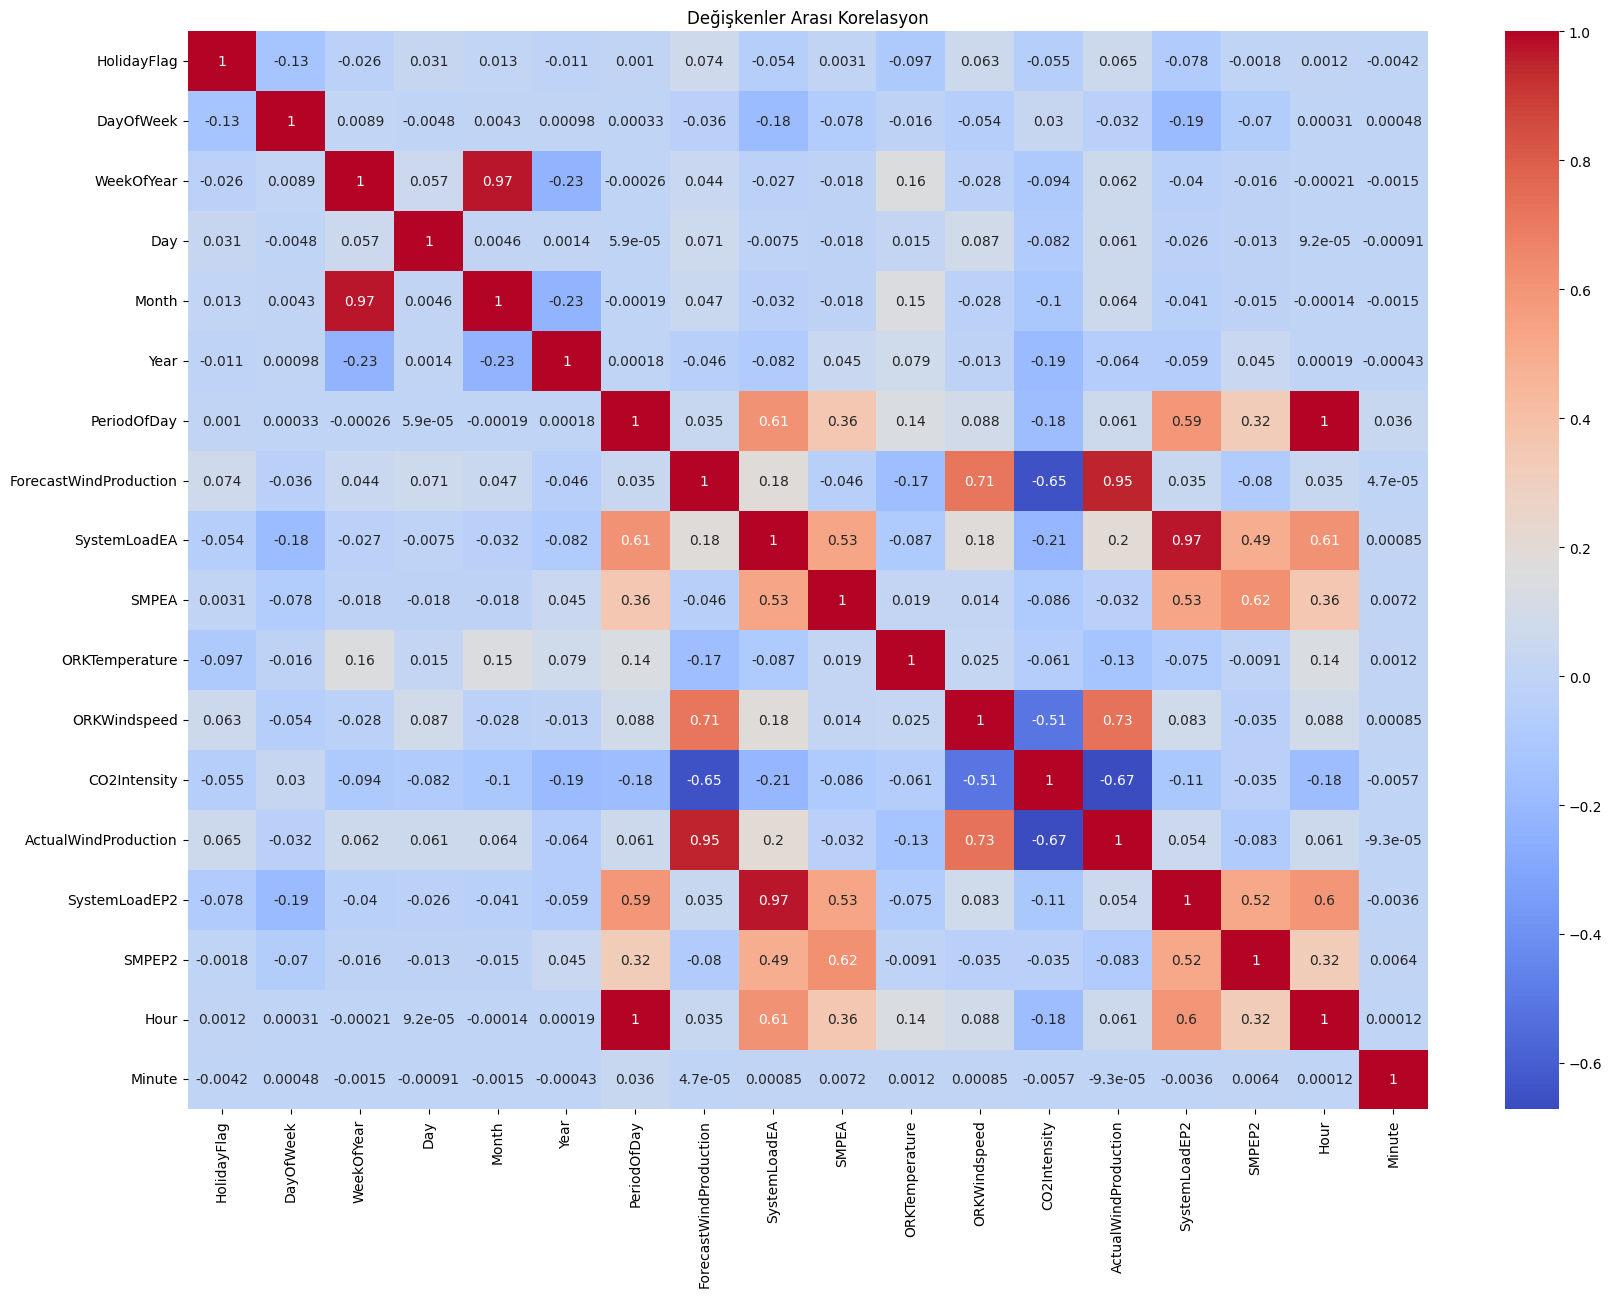

In [20]:
corr = df.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Değişkenler Arası Korelasyon")
plt.show()

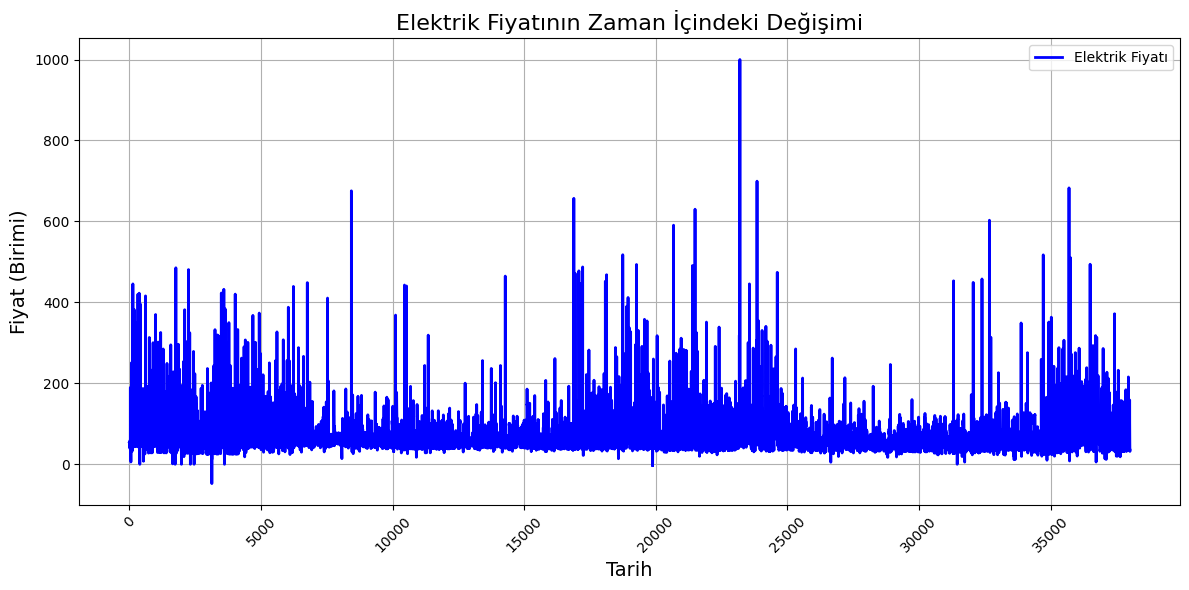

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df["SMPEP2"], color='blue', linewidth=2, label='Elektrik Fiyatı')

# Başlık ve etiketler
plt.title("Elektrik Fiyatının Zaman İçindeki Değişimi", fontsize=16)
plt.xlabel("Tarih", fontsize=14)
plt.ylabel("Fiyat (Birimi)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Grafiği göster
plt.tight_layout()  # Görselleştirmeyi sıkıştır
plt.show()

In [22]:
smpep2_correlation = corr['SMPEP2']
print(smpep2_correlation.sort_values(ascending=False))

SMPEP2                    1.000000
SMPEA                     0.618158
SystemLoadEP2             0.517081
SystemLoadEA              0.491096
PeriodOfDay               0.323490
Hour                      0.323470
Year                      0.045456
Minute                    0.006444
HolidayFlag              -0.001838
ORKTemperature           -0.009087
Day                      -0.012801
Month                    -0.014918
WeekOfYear               -0.015814
CO2Intensity             -0.035055
ORKWindspeed             -0.035436
DayOfWeek                -0.069625
ForecastWindProduction   -0.079639
ActualWindProduction     -0.083434
Name: SMPEP2, dtype: float64


In [23]:
# Mevcut özelliklerimizi iyileştirelim
print(df[['PeriodOfDay', 'Hour']].corr())

             PeriodOfDay      Hour
PeriodOfDay     1.000000  0.999349
Hour            0.999349  1.000000


In [24]:
df.drop('PeriodOfDay', axis=1, inplace=True)

In [25]:
df['Season'] = df['Month'].apply(lambda x: (x%12 + 3)//3)  # 1:Winter, 2:Spring, 3:Summer, 4:Autumn

In [26]:
# Günün bölümlerini kategorik değişkene çevirelim (Sabah, Öğle, Akşam, Gece)
df['DayPart'] = pd.cut(df['Hour'], 
                       bins=[-1, 6, 12, 18, 24],
                       labels=['Gece', 'Sabah', 'Öğle', 'Akşam'])

In [27]:
df = pd.get_dummies(df, columns=['DayPart', 'Season'], drop_first=True)

In [28]:
df.sample(5)

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,...,SystemLoadEP2,SMPEP2,Hour,Minute,DayPart_Sabah,DayPart_Öğle,DayPart_Akşam,Season_2,Season_3,Season_4
35994,0,1,47,19,11,2013,1018.21,4388.41,54.24,4.0,...,3938.74,49.04,22,0,False,False,True,False,False,True
16240,0,3,40,4,10,2012,212.60,4559.62,77.01,8.0,...,4540.46,67.29,9,0,True,False,False,False,False,True
2225,0,5,50,17,12,2011,1045.44,4015.02,46.29,2.0,...,3732.69,45.45,8,30,True,False,False,False,False,False
3203,0,4,1,6,1,2012,1291.88,6042.36,199.18,10.0,...,5468.21,243.34,17,30,False,True,False,False,False,False
5305,0,6,7,19,2,2012,62.39,4609.01,68.34,7.0,...,4337.09,60.72,12,30,True,False,False,False,False,False


## Veri Normalizasyonu ve Train-Test Ayrımı

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('SMPEP2', axis=1)
y = df['SMPEP2']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
num_cols = ['ForecastWindProduction', 'SystemLoadEA', 'SMPEA', 
            'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
            'ActualWindProduction', 'SystemLoadEP2']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

Eğitim verisi boyutu: (30145, 22)
Test verisi boyutu: (7537, 22)


## Model Eğitimi ve Değerlendirme

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [36]:
rf_model = RandomForestRegressor(n_estimators=200, 
                                max_depth=15, 
                                min_samples_split=5,
                                random_state=42,
                                n_jobs=-1)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [37]:
y_pred = rf_model.predict(X_test)

In [38]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.4f}")
    
    return rmse, mae, r2

print("Random Forest Model Performansı:")
rmse, mae, r2 = evaluate_model(y_test, y_pred)

Random Forest Model Performansı:
RMSE: 23.99
MAE: 10.04
R2 Score: 0.5571


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                          param_grid=param_grid,
                          cv=3,
                          n_jobs=-1,
                          verbose=2,
                          scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("En iyi parametreler:", best_params)

y_pred_best = best_model.predict(X_test)

print("Optimize Edilmiş Model Performansı:")
evaluate_model(y_test, y_pred_best)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
En iyi parametreler: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Optimize Edilmiş Model Performansı:
RMSE: 22.99
MAE: 8.81
R2 Score: 0.5932


(22.98639869248043, 8.808996498140466, 0.5932072152697767)

In [80]:
import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

best_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(best_model, 'electricity_price_model.joblib')

# Save the scaler for future use
joblib.dump(scaler, 'scaler.joblib')

# Save feature list
with open('feature_list.pkl', 'wb') as f:
    pickle.dump(list(X_train.columns), f)

## Elektrik Fiyatı Tahmini Projesi Sonuçları

Bu projede, elektrik fiyatı (SMPEP2) tahmin etmek için Random Forest regresyon modeli geliştirildi. 
Veri seti üzerinde yapılan analizler sonucunda:

1. En etkili özellikler:
   - SMPEA (Tahmin edilen fiyat)
   - SystemLoadEP2 (Gerçek ulusal sistem yükü)
   - SystemLoadEA (Tahmin edilen ulusal yük)
   
2. Model Performansı:
   - RMSE: 22.99
   - MAE: 8.81
   - R² Score: 0.5932
   
3. Zaman ve mevsimsel özellikler (saat, mevsim, günün bölümü) tahmin kalitesini iyileştirdi.

4. Rüzgar üretimi ve CO2 yoğunluğu gibi çevresel faktörler ile fiyat arasında negatif korelasyon gözlemlendi.

Model, optimizasyon süreci sonrasında yaklaşık %60 doğruluk oranına ulaştı. Gerçek zamanlı veri akışı 
ve daha gelişmiş özellik mühendisliği ile performans daha da artırılabilir.

### Hata Bildirimiİ

Proje dosyasını huffinface yüklemeye çalışırken  htalar yaşadım.(Error: The requested file could not be read, typically due to permission problems that have occurred after a reference to a file was acquired.)

![Elektrik Fiyatı Tahmini](elek1.png)

![Elektrik Fiyatı Tahmini](elek2.png)